<a href="https://colab.research.google.com/github/subhajit3827/MLM2-Projects/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
train = pd.read_csv(r'/gdrive/MyDrive/Credit risk/cs-training.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'/gdrive/MyDrive/Credit risk/cs-test.csv').drop(['Unnamed: 0'],axis=1)

In [5]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
train.shape

(150000, 11)

In [8]:
test.shape

(101503, 11)

In [9]:
train.duplicated().sum()

609

In [10]:
train.duplicated().value_counts()

,count
False,149391
True,609


In [11]:
train_redup = train.drop_duplicates()

In [12]:
train_redup.duplicated().sum()

0

In [13]:
train_redup.shape

(149391, 11)

In [14]:
train_redup.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29221
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [15]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [16]:
findMiss(train_redup)

,0
SeriousDlqin2yrs,0.00
RevolvingUtilizationOfUnsecuredLines,0.00
age,0.00
NumberOfTime30-59DaysPastDueNotWorse,0.00
DebtRatio,0.00
MonthlyIncome,19.56
NumberOfOpenCreditLinesAndLoans,0.00
NumberOfTimes90DaysLate,0.00
NumberRealEstateLoansOrLines,0.00
NumberOfTime60-89DaysPastDueNotWorse,0.00


In [17]:
train_redup[train_redup.NumberOfDependents.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [18]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [19]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [20]:
fam_miss.shape

(3828, 11)

In [21]:
fam_nmiss.shape

(145563, 11)

In [22]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [23]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

<ipython-input-23-eeda2eaba563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
<ipython-input-23-eeda2eaba563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [24]:
findMiss(fam_miss)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


In [25]:
findMiss(fam_nmiss)

,0
SeriousDlqin2yrs,0.00
RevolvingUtilizationOfUnsecuredLines,0.00
age,0.00
NumberOfTime30-59DaysPastDueNotWorse,0.00
DebtRatio,0.00
MonthlyIncome,17.44
NumberOfOpenCreditLinesAndLoans,0.00
NumberOfTimes90DaysLate,0.00
NumberRealEstateLoansOrLines,0.00
NumberOfTime60-89DaysPastDueNotWorse,0.00


In [26]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])


,MonthlyIncome
mean,6675.098269
median,5400.000000
min,0.000000


In [27]:
fam_nmiss['MonthlyIncome'].agg(['max'])

,MonthlyIncome
max,3008750.0


In [28]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

<ipython-input-28-55bbbc7c8038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [29]:
findMiss(fam_nmiss)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


In [30]:
filled_train = pd.concat([fam_nmiss, fam_miss], ignore_index=True)

In [31]:
filled_train.shape

(149391, 11)

In [32]:
findMiss(filled_train)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


In [33]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [34]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

,0
SeriousDlqin2yrs,
0,0.933001
1,0.066999


In [35]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

,RevolvingUtilizationOfUnsecuredLines
count,149391.000000
mean,6.071087
std,250.263672
min,0.000000
25%,0.030132
50%,0.154235
75%,0.556494
max,50708.000000


In [36]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

,RevolvingUtilizationOfUnsecuredLines
0.99,1.093922


In [37]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [38]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,224
1,17


In [39]:
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [40]:
util_droped.shape

(149150, 11)

In [41]:
util_droped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: ylabel='age'>

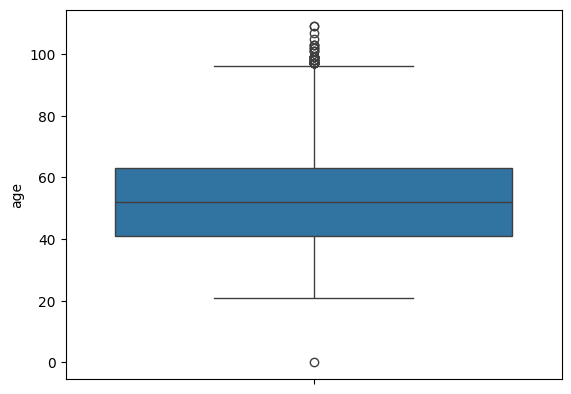

In [42]:
sns.boxplot(util_droped['age'])

In [43]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

,0
NumberOfTime30-59DaysPastDueNotWorse,
0,125239
1,16020
2,4588
3,1750
4,747
5,342
6,140
7,54
8,25


In [44]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

,0
NumberOfTime60-89DaysPastDueNotWorse,
0,141601
1,5723
2,1117
3,318
4,104
5,34
6,16
7,8
8,2


In [45]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

,0
NumberOfTimes90DaysLate,
0,140875
1,5227
2,1554
3,666
4,291
5,131
6,80
7,38
8,20


In [46]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,89
1,136


In [47]:
util_droped['DebtRatio'].describe()

,DebtRatio
count,149150.000000
mean,354.085328
std,2042.235713
min,0.000000
25%,0.177334
50%,0.368200
75%,0.874241
max,329664.000000


<Axes: xlabel='DebtRatio', ylabel='Density'>

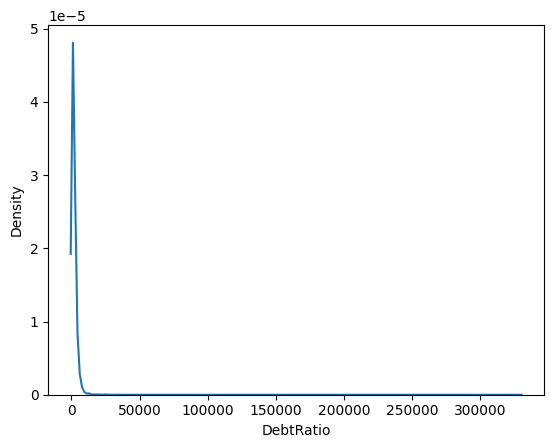

In [48]:
sns.kdeplot(util_droped['DebtRatio'])

In [49]:
util_droped['DebtRatio'].quantile([.90])

,DebtRatio
0.9,1273.0


In [72]:
util_droped['DebtRatio'].quantile([.805])

,DebtRatio
0.805,8.0


In [73]:
util_droped[util_droped['DebtRatio']>8][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,29080.000000,29080.000000
mean,0.055708,4420.658081
std,0.229362,2096.138146
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,33333.000000


In [75]:
temp = util_droped[(util_droped['DebtRatio']>8) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In [76]:
temp.groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,4428
1,14


In [77]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>8) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

In [78]:
dRatio.shape

(144708, 11)

In [79]:
dRatio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [85]:
# prompt: number of data in dRatio where DebtRatio are greater than 8

len(dRatio[dRatio['DebtRatio'] > 8])


24638

In [86]:
dRatio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
model = XGBClassifier(tree_method = 'exact')

In [89]:
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [90]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [91]:
accuracy_score(y,y_pred)

0.9462572905437157

In [93]:
confusion_matrix(y,y_pred)

array([[133911,    819],
       [  6958,   3020]])

In [94]:
cm = confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'actuals')

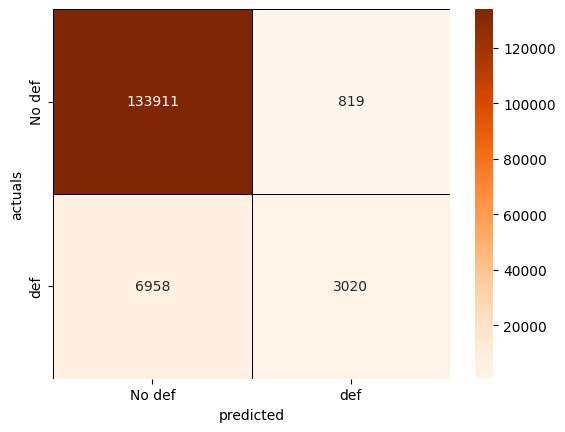

In [95]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [96]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    134730
           1       0.79      0.30      0.44      9978

    accuracy                           0.95    144708
   macro avg       0.87      0.65      0.70    144708
weighted avg       0.94      0.95      0.93    144708

